# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [ ]:
#edit the file location of raw data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cust_df = pd.read_csv('/content/drive/MyDrive/Telecom Data.csv')

In [ ]:
cust_df.shape

(51047, 58)

## Exercise

**## Placeholder for your analysis**

In [ ]:

cust_df.size

2960726

In [ ]:
cust_df.describe

<bound method NDFrame.describe of        CustomerID Churn  MonthlyRevenue  ...  PrizmCode    Occupation  MaritalStatus
0         3000002   Yes           24.00  ...   Suburban  Professional             No
1         3000010   Yes           16.99  ...   Suburban  Professional            Yes
2         3000014    No           38.00  ...       Town        Crafts            Yes
3         3000022    No           82.28  ...      Other         Other             No
4         3000026   Yes           17.14  ...      Other  Professional            Yes
...           ...   ...             ...  ...        ...           ...            ...
51042     3399958   Yes             NaN  ...   Suburban         Other            Yes
51043     3399974    No           95.17  ...      Other         Other             No
51044     3399978   Yes             NaN  ...      Other      Clerical             No
51045     3399990    No             NaN  ...      Other         Other             No
51046     3399994    No        

In [ ]:
# Type your code here to explore and understand the data better
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:


#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

In [ ]:
cust_df[cust_df['MonthlyRevenue']==0]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,2,2,NMXELP915,2.0,2.0,597.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.3,5.3,0.0,7.1,0.7,0.7,11.3,2.0,0.0,0.0,0.0,26,2,2,SANSAN210,3.0,3.0,371.0,28.0,30.0,No,No,Yes,No,No,Unknown,No,Yes,No,No,No,Yes,0,0,No,Yes,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,2,2,OKCOKC405,1.0,1.0,307.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59,2,2,NEVCHU619,2.0,2.0,866.0,26.0,0.0,No,No,No,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,55,1,1,NEVOCN760,1.0,1.0,1671.0,42.0,36.0,No,No,No,No,No,Known,No,No,No,No,No,No,0,0,No,No,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,Unknown,No,2-High,Other,Professional,No


### Q1.1 How many customers had zero monthly revenue?
There are 6 customers with monthly revenue 0

In [ ]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df = cust_df[cust_df['MonthlyRevenue']!=0]


### Q1.2 How many columns has missing values percentage > 5%

In [ ]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
percent_missing = cust_df.isnull().sum() * 100 / len(cust_df)
missing_value_df = pd.DataFrame({'column_name': cust_df.columns,
                                 'percent_missing': percent_missing}) 
missing_value_df

,column_name,percent_missing
CustomerID,CustomerID,0.000000
Churn,Churn,0.000000
MonthlyRevenue,MonthlyRevenue,0.305637
MonthlyMinutes,MonthlyMinutes,0.305637
TotalRecurringCharge,TotalRecurringCharge,0.305637
DirectorAssistedCalls,DirectorAssistedCalls,0.305637
OverageMinutes,OverageMinutes,0.305637
RoamingCalls,RoamingCalls,0.305637
PercChangeMinutes,PercChangeMinutes,0.715111
PercChangeRevenues,PercChangeRevenues,0.715111


<mark>__Result:__
    
No Columns are Having Missing Values more than 5%. So we can drop those rows which has missing values as the number of missing values are less

In [ ]:
cust_df.dropna(axis=0, inplace=True)

In [ ]:
cust_df.shape

(49748, 58)

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

Text(0.5, 1.0, 'Boxplot')

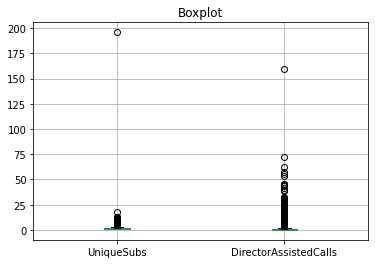

In [ ]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)
plt.title('Boxplot')

UniqueSubs               5.00
DirectorAssistedCalls    9.65
Name: 0.99, dtype: float64


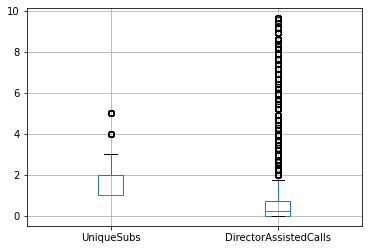

In [ ]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

print(cust_df[cols].quantile(0.99))

cust_df = cust_df[(cust_df['UniqueSubs']<=5) & (cust_df['DirectorAssistedCalls']<=9.65)]

cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

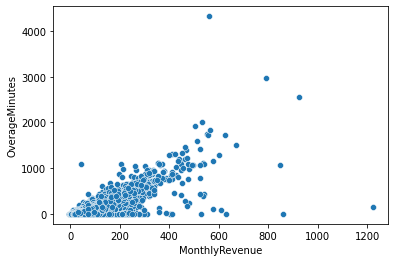

In [ ]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df )

In [ ]:
column_1 = cust_df ['MonthlyRevenue']
column_2 = cust_df ['OverageMinutes']
correlation = column_1.corr(column_2)
print("The Correlation Between MonthlyRevenue and OverageMinutes is = "+ str(correlation))

The Correlation Between MonthlyRevenue and OverageMinutes is = 0.7830341461762195


<mark>__Result:__
    
MonthlyRevenue and OverageMinutes have a strong positive correlation which is 0.787 and it tends to +1, also both the variables move in the same direction, therefore customers with high overage minutes also have high revenue

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

In [ ]:
print(cust_df['ActiveSubs'].value_counts())

1    35031
2    11771
3     1774
4      362
5       91
0       37
Name: ActiveSubs, dtype: int64


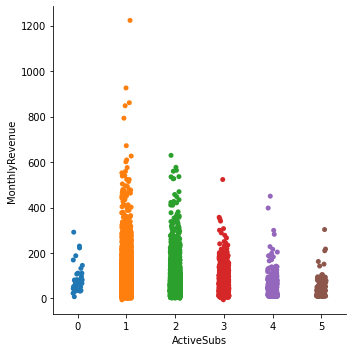

In [ ]:
#use category plot to plot monthly revenue for each active subs category
ax = sns.catplot(x="ActiveSubs", y="MonthlyRevenue", data= cust_df) 

<mark>__Result:__
    
It seems with the Higher Number of Active Subs the Monthly Revenue Decreases

### Q2.3 Does credit rating have an impact in churn rate?

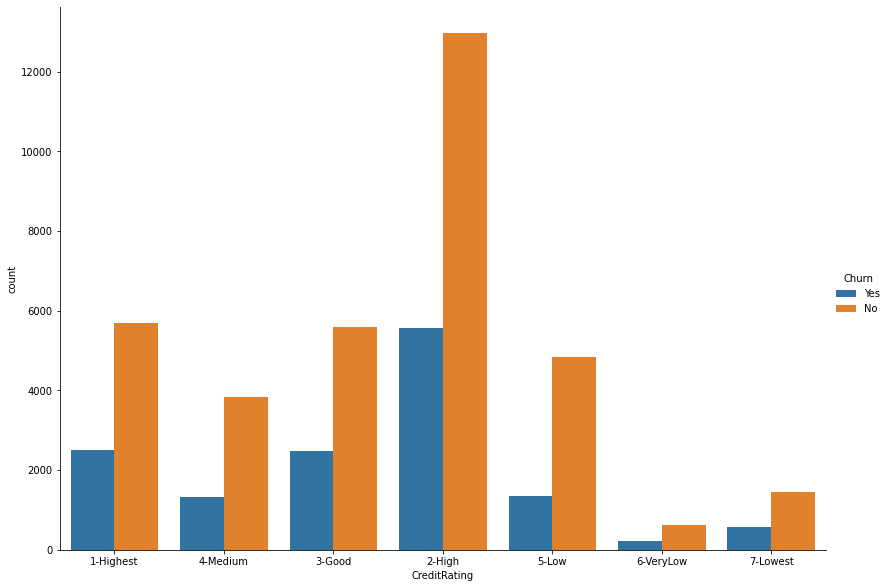

In [ ]:
sns.catplot(x="CreditRating",kind='count', data= cust_df, hue='Churn', height=8.27, aspect=11.7/8.27)

<mark>__Result:__
    
Customers falling under the category of High CreditRating has recorded to be maximum in churning as wells as not churning among all categories. Customers falling under all categories has the higher count of not churning compared to the customers who churned in every category of credit rating

### Placeholder for additional exploratory analysis

In [ ]:
#type your code here for any additional exploratory analysis (if any)



## Q3. Create additional features to help predict churn

In [ ]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_mins'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [ ]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)

#Checking For Missing Values
cust_df.isna().sum()
print

#Investigating Missing Values
rows_with_nan = [ index for index, value in cust_df['perc_overage_mins'].iteritems() if np.isnan(value)]
cust_df.loc[rows_with_nan, ['OverageMinutes', 'MonthlyMinutes']]

#Filling Missing Values with  0
cust_df.fillna(value=0, axis=0, inplace=True)


CustomerID                 0
Churn                      0
MonthlyRevenue             0
MonthlyMinutes             0
TotalRecurringCharge       0
                        ... 
Occupation                 0
MaritalStatus              0
perc_active_subs           0
perc_recurrent_charge      0
perc_overage_mins        667
Length: 61, dtype: int64

<function print>

,OverageMinutes,MonthlyMinutes
4,0.0,0.0
90,0.0,0.0
110,0.0,0.0
152,0.0,0.0
212,0.0,0.0
...,...,...
50448,0.0,0.0
50571,0.0,0.0
50607,0.0,0.0
50745,0.0,0.0


In [ ]:
#Seperating categorical and continuous variables
categorical_cols = list(cust_df.select_dtypes('object').columns.values)
continuous_cols = list(cust_df.select_dtypes('number').columns.values)

#Removing unnecssary columns and target variable
categorical_cols = [i for i in categorical_cols if i not in ('Churn','CustomerID','ServiceArea')]
continuous_cols.remove('CustomerID')

**Created a Function that will choose Importnat Categorical Columns**

In [ ]:
def check_categorical_imp(cust_df, categorical_cols):
  new_categorical_cols = []
  for i in categorical_cols:
    if stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
      pass
    else:
      new_categorical_cols.append(i)

  return new_categorical_cols

In [ ]:
#Checking For Class imbalance
cust_df['Churn'].value_counts(normalize=True)*100

No     71.369176
Yes    28.630824
Name: Churn, dtype: float64

In [ ]:
#Encoding dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cust_df['Churn'] = le.fit_transform(cust_df['Churn'])

class_count_0, class_count_1 = cust_df['Churn'].value_counts()

class_0 = cust_df[cust_df['Churn']== 0]
class_1 = cust_df[cust_df['Churn']== 1]#print the shape of the Class

class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

#Assigning oversampled dataframe back to cust_df
cust_df = test_over
cust_df['Churn'].value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Churn, dtype: float64

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [ ]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = cust_df[check_categorical_imp(cust_df, categorical_cols)+ continuous_cols]
Y = cust_df['Churn']
#Create dummy variables for all categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()





In [ ]:
#Scaling testing and training data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,plot_confusion_matrix,average_precision_score,roc_curve,plot_roc_curve

#creating an instance of logistic regression model
lr = LogisticRegression(random_state=0)

#Training model on training data
lr.fit(X_train, y_train)

# Predicting Probabilities of Customer Churning in Test Data
y_prediction = lr.predict_proba(X_test)[:,1]



LogisticRegression(random_state=0)

In [ ]:
#Finding Optimal Threshold Value
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)

accuracy_lr=[]
for i in thresholds:
  y_pred = np.where(y_prediction > i, 1, 0)
  accuracy_lr.append(accuracy_score(y_test, y_pred))

accuracy_lr = pd.concat([pd.Series(thresholds), pd.Series(accuracy_lr)], axis=1)
accuracy_lr.columns=['thresholds','accuracy']
accuracy_lr.sort_values('accuracy', ascending=False, inplace=True)
display(accuracy_lr[:5])


best_threshold_lr = accuracy_lr.iloc[0,0]


,thresholds,accuracy
4658,0.521174,0.588311
4657,0.521181,0.588263
4659,0.521147,0.588263
4692,0.520257,0.588216
4694,0.520233,0.588216


In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
y_prediction_lr = lr.predict_proba(X_test)[:,1]


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

y_prediction_lr[y_prediction_lr >= best_threshold_lr] = 1

y_prediction_lr[y_prediction_lr < best_threshold_lr] = 0



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
print(classification_report(y_test, y_prediction_lr))
test_auc = roc_auc_score(y_test, y_prediction_lr)
print("Logistic Regression's roc-auc is: {}".format(test_auc))

print("\nConfusion Matrix: \n{}".format(confusion_matrix(y_test, y_prediction_lr)))

tn,fp, fn, tp = confusion_matrix(y_test, y_prediction_lr).ravel()
print("\nTrue Negatives: {} \nFalse Positives: {} \nFalse Negatives: {}  \nTrue Positives: {}".format(tn, fp, fn, tp))

              precision    recall  f1-score   support

           0       0.58      0.65      0.62     10641
           1       0.59      0.52      0.56     10370

    accuracy                           0.59     21011
   macro avg       0.59      0.59      0.59     21011
weighted avg       0.59      0.59      0.59     21011

Logistic Regression's roc-auc is: 0.5874365287301886

Confusion Matrix: 
[[6933 3708]
 [4943 5427]]

True Negatives: 6933 
False Positives: 3708 
False Negatives: 4943  
True Positives: 5427


Text(0.5, 0, 'fpr')

Text(0, 0.5, 'tpr')

Text(0.5, 1.0, 'ROC-AUC Curve for Logistic Regression')

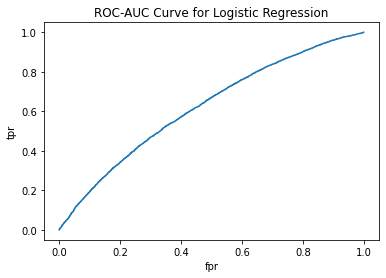

In [ ]:
#Plotting a ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC-AUC Curve for Logistic Regression')
plt.show()

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier

#Creating an instance of Random Classifier Model
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

#Training the Model on training data
rf.fit(X_train, y_train)

#Predicting probabilities of customer churning in Test Data
rf_test_output = rf.predict_proba(X_test)[:,1]





RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
#indicating the optimal threshold value
pr, tpr, thresholds = roc_curve(y_test, rf_test_output)

accuracy_rf=[]
for i in thresholds:
  y_pred = np.where(rf_test_output > i, 1, 0)
  accuracy_rf.append(accuracy_score(y_test, y_pred))

accuracy_rf = pd.concat([pd.Series(thresholds), pd.Series(accuracy_rf)], axis=1)
accuracy_rf.columns=['thresholds','accuracy']
accuracy_rf.sort_values('accuracy', ascending=False, inplace=True)
display(accuracy_rf[:5])


best_threshold_rf = accuracy_rf.iloc[0,0]


,thresholds,accuracy
42,0.59,0.900814
43,0.58,0.900719
44,0.57,0.900290
41,0.60,0.899719
45,0.56,0.899053


In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
y_prediction_rf = rf.predict_proba(X_test)[:,1]


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
y_prediction_rf[y_prediction_rf >= best_threshold_rf] = 1

y_prediction_rf[y_prediction_rf < best_threshold_rf] = 0



#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
print(classification_report(y_test, y_prediction_rf))
test_auc = roc_auc_score(y_test, y_prediction_rf)
print("Logistic Regression's roc-auc is: {}".format(test_auc))

print("\nConfusion Matrix: \n{}".format(confusion_matrix(y_test, y_prediction_rf)))

tn_n,fp_n, fn_n, tp_n = confusion_matrix(y_test, y_prediction_rf).ravel()
print("\nTrue Negatives: {} \nFalse Positives: {} \nFalse Negatives: {}  \nTrue Positives: {}".format(tn, fp, fn, tp))



              precision    recall  f1-score   support

           0       0.85      0.97      0.91     10641
           1       0.97      0.83      0.89     10370

    accuracy                           0.90     21011
   macro avg       0.91      0.90      0.90     21011
weighted avg       0.91      0.90      0.90     21011

Logistic Regression's roc-auc is: 0.8997701436294198

Confusion Matrix: 
[[10357   284]
 [ 1802  8568]]

True Negatives: 10357 
False Positives: 284 
False Negatives: 1802  
True Positives: 8568


<mark>__Result:__
    
The Random Forest Classifier Model is having a better accuracy than the Logistic Regression model, it can be seen from accuracy_score, recall and f1_score being more in Random Forest Classifier

### Q4.3 Identify most important features impacting churn

<Figure size 360x576 with 0 Axes>

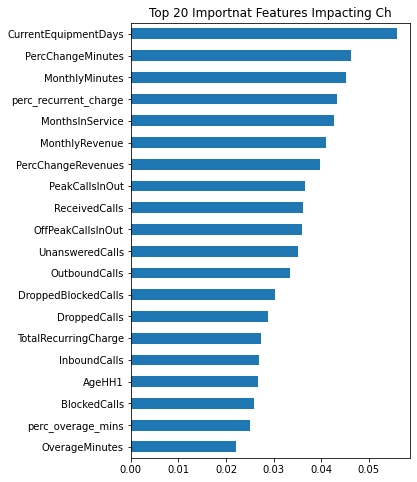

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

top_20_features = pd.Series(rf.feature_importances_, index=X.columns).nlargest(20)
plt.figure(figsize=(5,8))
top_20_features.sort_values(ascending=True).plot.barh(title='Top 20 Importnat Features Impacting Ch')

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [ ]:
#Type your code here to predict churners based on the hold out data set provided
predict = pd.read_csv('/content/drive/MyDrive/Telecom - Prediction Data.csv')

#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
create_features(cust_df=predict)
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

customer_id = predict['CustomerID']

#Use "predict" function on the transformend data using the best fitted model object
predict = predict[check_categorical_imp(cust_df,categorical_cols)+ continuous_cols]

predict['perc_overage_mins'].fillna(0, inplace=True)



,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,0,No,0,40,No,1-Highest,Other,Other,Unknown,0.666667,1.033470,0.001227
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes,1.000000,NaN,NaN
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,LAXCOR909,1,1,773,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No,1.000000,NaN,NaN
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,26.7,4.3,0.0,235.4,35.0,3.3,146.3,115.3,22.3,0.0,6.3,25,1,1,LAXLAG949,3,2,32,28.0,48.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,150,No,3-Good,Other,Other,Unknown,1.000000,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Checking for Missing Values
missing_cols = []
for i, v in (predict.isna().sum() / predict.shape[0] * 100).iteritems():
  if v > 0:
    missing_cols.append(i)

#filling missing values with median of each column
predict[missing_cols] = predict[missing_cols].fillna(predict[missing_cols].median(), axis=0)

In [ ]:
#Creating Dummy Variables
predict = pd.get_dummies(predict, drop_first=True)

In [ ]:
#Feature Scaling
X = sc.fit_transform(predict)

In [ ]:
churn_pred = rf.predict(X)

#Adding a New Column to check Customers who are going to churn
predict['Churn'] = churn_pred

#Adding CustomerID column back to the predict dataframe
predict['CustomerID'] = customer_id
print(predict['Churn'].value_counts())

#Customers who are going to churn
predict.loc[predict['Churn'] == 1, ['CustomerID','Churn']]

0    17051
1     2949
Name: Churn, dtype: int64


,CustomerID,Churn
41,3000866,1
54,3001142,1
55,3001158,1
58,3001278,1
72,3001614,1
...,...,...
19924,3398434,1
19945,3398794,1
19954,3398990,1
19961,3399134,1


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   